In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Checking for missing values
df[df.isnull().any(axis=1)]
#Hence proved no null values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [6]:
cant_be_zero_cols=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
count_zeros=(df[cant_be_zero_cols]==0).sum().sort_values(ascending=False)
print("zerocounts= \n",count_zeros)
#Treat zero values in these columns as missing

zerocounts= 
 Insulin          374
SkinThickness    227
BloodPressure     35
BMI               11
Glucose            5
dtype: int64


In [7]:
df[cant_be_zero_cols]=df[cant_be_zero_cols].replace(0,np.nan)
for col in cant_be_zero_cols :
    median_val=df[col].median()
    df[col]=df[col].fillna(median_val)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
from sklearn.model_selection import train_test_split
X=df.drop("Outcome",axis=1)
y=df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30 , random_state =42 , stratify = y)
print("Train size:",X_train.shape,"Test size:",X_test.shape)
print("Class Ratio train :\n",y_train.value_counts(normalize=True))
print("Class Ratio test :\n",y_test.value_counts(normalize=True))


Train size: (537, 8) Test size: (231, 8)
Class Ratio train :
 Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64
Class Ratio test :
 Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Fittinng only on training data prevents information leakage from test to train
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ 

🔹 Logistic Regression Results
Accuracy: 0.7445887445887446
ROC-AUC: 0.8361316872427983
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



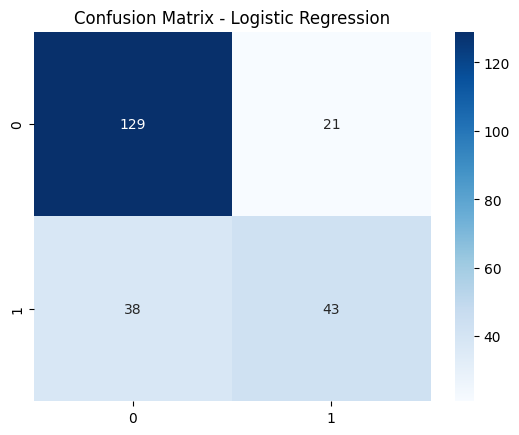

In [13]:
#M1 : Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]  # needed for AUC

print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

🔹 KNN Results
Accuracy: 0.7445887445887446
ROC-AUC: 0.8034156378600823
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



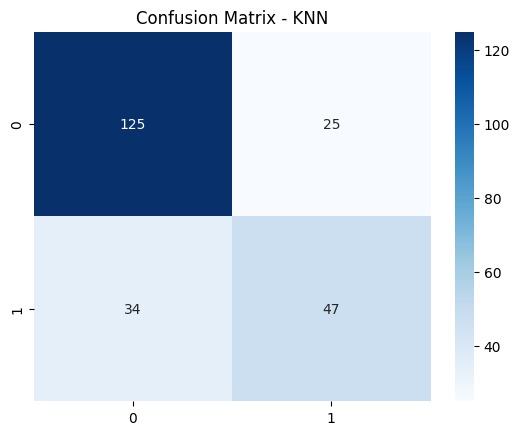

In [ ]:
#M2 : KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

print("🔹 KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

🔹 Naive Bayes Results
Accuracy: 0.7272727272727273
ROC-AUC: 0.8039506172839506
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       150
           1       0.62      0.58      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231



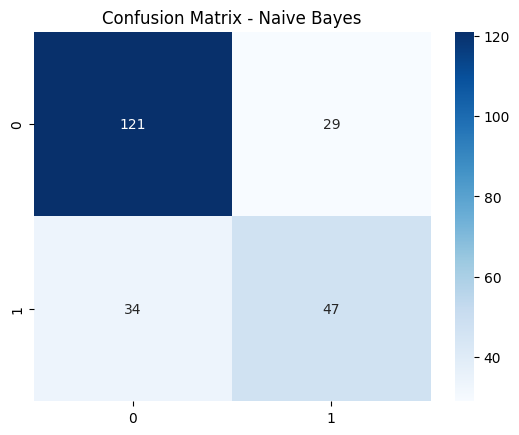

In [15]:
#M3 : Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)
y_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]

print("🔹 Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nb))
print(classification_report(y_test, y_pred_nb))

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


🔹 Decision Tree Results
Accuracy: 0.696969696969697
ROC-AUC: 0.6587654320987655
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       150
           1       0.57      0.53      0.55        81

    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.70      0.69       231



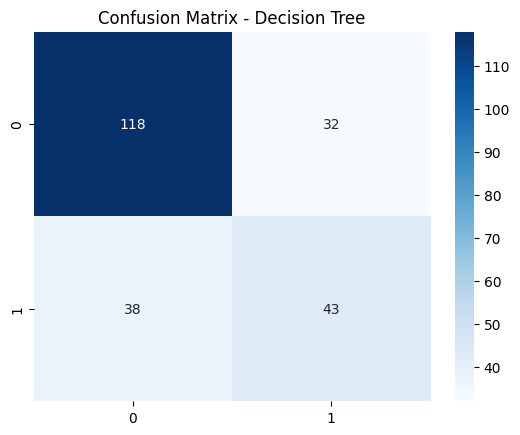

In [16]:
#M4 : Decision Trees

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

print("🔹 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

🔹 Random Forest Results
Accuracy: 0.7402597402597403
ROC-AUC: 0.8168724279835391
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



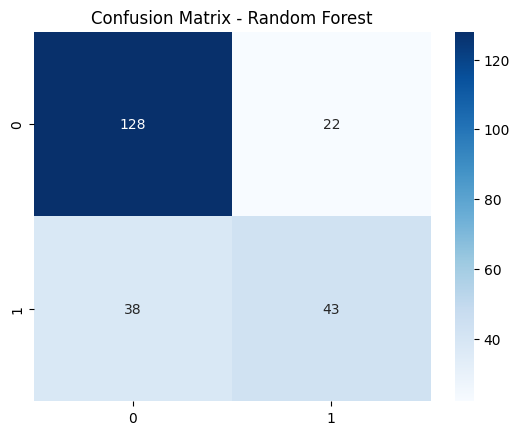

In [17]:
#M5 : Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

🔹 SVM Results
Accuracy: 0.7402597402597403
ROC-AUC: 0.8176954732510286
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



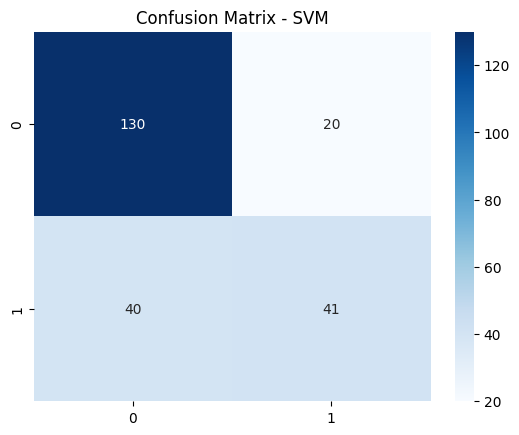

In [18]:
#M6 : SVM (SVC)

from sklearn.svm import SVC

svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

print("🔹 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))
print(classification_report(y_test, y_pred_svm))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

Performance of Models - Analysis

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, model, X_test, y_test):
    """
    Evaluates a trained ML model on test data.
    
    Parameters:
    name (str): Model name (for reference in results table)
    model: Trained ML model
    X_test (DataFrame): Features of test set
    y_test (Series): True labels of test set
    
    Returns:
    DataFrame: A one-row DataFrame containing evaluation metrics
    """
    # Step 1: Make predictions on test set
    y_pred = model.predict(X_test)

    # Step 2: Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Step 3: Store results in a DataFrame (one row)
    results = pd.DataFrame({
        "Model": [name],
        "Accuracy": [acc],
        "Precision": [prec],
        "Recall": [rec],
        "F1 Score": [f1]
    })
    
    return results

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

all_results = pd.DataFrame()  # empty DF to store all results

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Evaluate
    results = evaluate_model(name, model, X_test, y_test)
    
    # Append
    all_results = pd.concat([all_results, results], ignore_index=True)

# Show final comparison table
print(all_results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.740260   0.672131  0.506173  0.577465
1        Decision Tree  0.701299   0.581081  0.530864  0.554839
2        Random Forest  0.740260   0.656716  0.543210  0.594595
3                  SVM  0.744589   0.720000  0.444444  0.549618
4                  KNN  0.696970   0.577465  0.506173  0.539474


/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/anaconda3/envs/diabetesproj/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ 

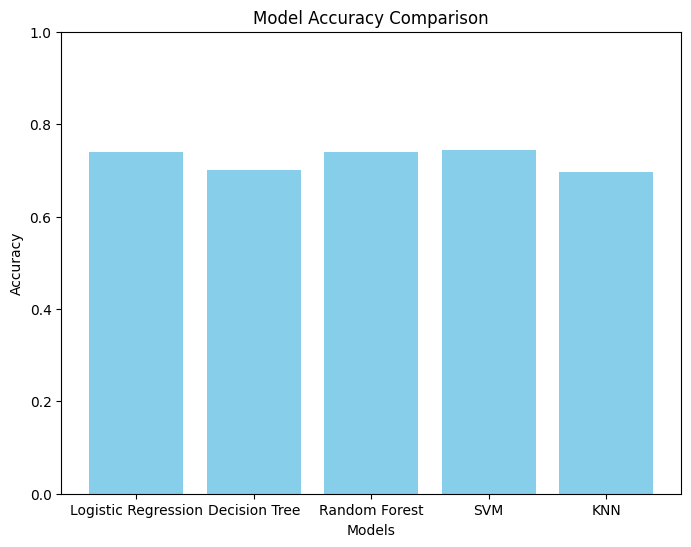

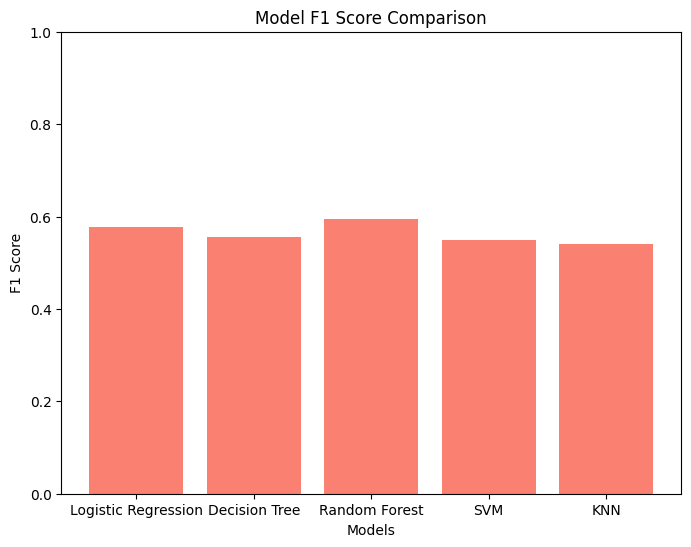

In [ ]:
#Bar Plot for Model metrics

import matplotlib.pyplot as plt

# Bar chart for accuracy
plt.figure(figsize=(8,6))
plt.bar(all_results["Model"], all_results["Accuracy"], color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# Bar chart for F1 Score
plt.figure(figsize=(8,6))
plt.bar(all_results["Model"], all_results["F1 Score"], color='salmon')
plt.title("Model F1 Score Comparison")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.show()

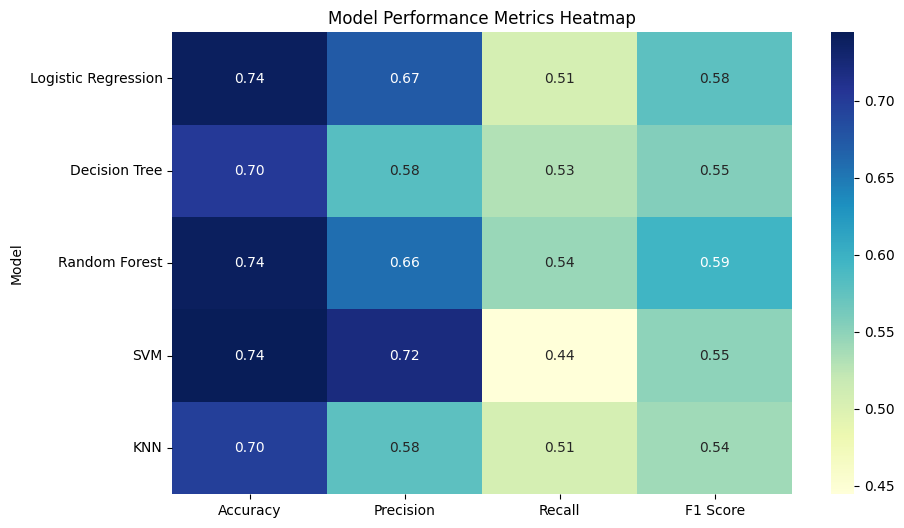

In [ ]:
#Heatmap of Metrics

import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(all_results.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Metrics Heatmap")
plt.show()

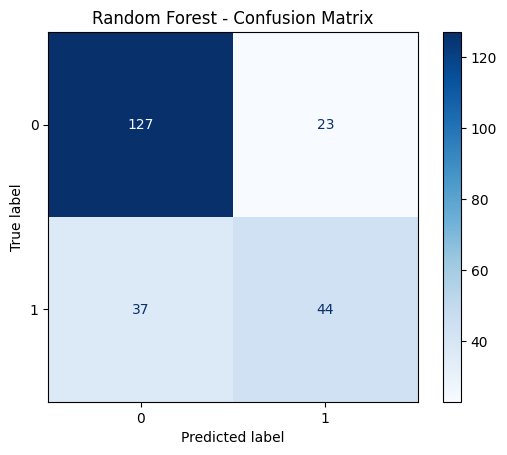

In [ ]:
#Confusion Matrix for the Best Model (Random Forest)

from sklearn.metrics import ConfusionMatrixDisplay

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues")
disp.ax_.set_title("Random Forest - Confusion Matrix")
plt.show()